<a href="https://colab.research.google.com/github/kendraveren/clustering-mall-segmentation/blob/main/Clustering%20Customer%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLUSTERING MALL SEGMENTATION**

**KENDRA VEREN WIDYA A / DS - 02 / DS 0213**

Clustering merupakan metode yang digunakan untuk menganalisis data yang menjadi salah satu teknik dalam data mining dengan tujuan mengelompokkan suatu data dengan ciri - ciri sama ke dalam  suatu "wilayah" yang sama dan data dengan ciri - ciri yang berbeda ke dalam "wilayah" yang lain.

Berikut merupakan salah satu contoh analisis data customer segmetation pada suatu mall, data berumber dari https://github.com/kendraveren/clustering-mall-segmentation/blob/main/Mall_Customers.csv dimana data tersebut didownload dari https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

### **Import Libraries**

Import libraries dilakukan untuk mengimport package yang dibutuhkan.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Import Raw Dataset**

Selanjutnya dilakukan import data csv yang akan digunakan, data bersumber dari https://github.com/kendraveren/clustering-mall-segmentation/blob/main/Mall_Customers.csv dimana data tersebut didownload dari https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [30]:
# Import Dataset
df_segmentation = pd.read_csv('https://raw.githubusercontent.com/kendraveren/clustering-mall-segmentation/main/Mall_Customers.csv')
df_segmentation

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Langkah selanjutnya menghilangkan data mengenai gender

In [31]:
df_segmentation = df_segmentation.drop(["Gender", "CustomerID", "Age"], axis = 1)
df_segmentation.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [32]:
# Prints the Dataset Information
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [33]:
# Prints Descriptive Statistics
df_segmentation.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


Drai hasil perhitungan descriptive statistics didapatkan banyaknya dara dari masing - masing kolom yakni 200 data dengan rata - rata income sebesar 60,56 dan rata - rata spending sebesar 50,20. Dengan nilai standar deviasai pada kolom 1 sebesar 26,264721 dan pada kolom 2 sebesar 25,823522. 

### **Data Preprocessing**

In [34]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df_segmentation.columns.tolist()
df_segmentation[column_names] = scaler.fit_transform(df_segmentation[column_names])
df_segmentation.sort_index(inplace=True)
df_segmentation

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


### **Data Visualization**

Text(0, 0.5, 'Annual Spend')

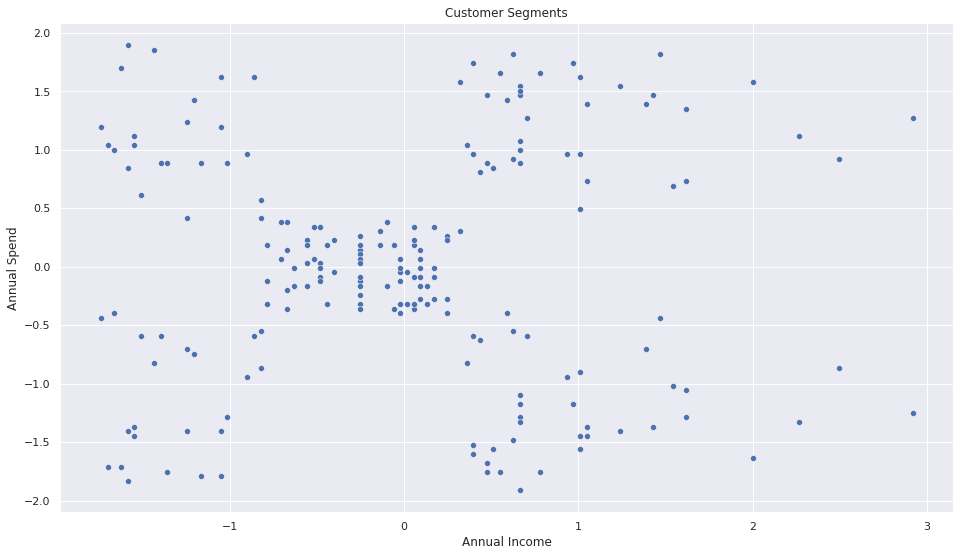

In [41]:
# Styling Plot
sns.set() 
plt.rcParams['figure.figsize'] = (16, 9)

# Visualizing the Data
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_segmentation)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')

## **K-Means Clustering**

K-Means Clustering adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan tanpa supervisi (unsupervised) dan merupakan salah satu metode yang melakukan pengelompokan data dengan sistem partisi.

Terdapat dua jenis data clustering yang sering dipergunakan dalam proses pengelompokan data yaitu Hierarchical dan Non-Hierarchical, dan K-Means merupakan salah satu metode data clustering non-hierarchical atau Partitional Clustering.

### **Search for the Optimum Number of Cluster (k)**

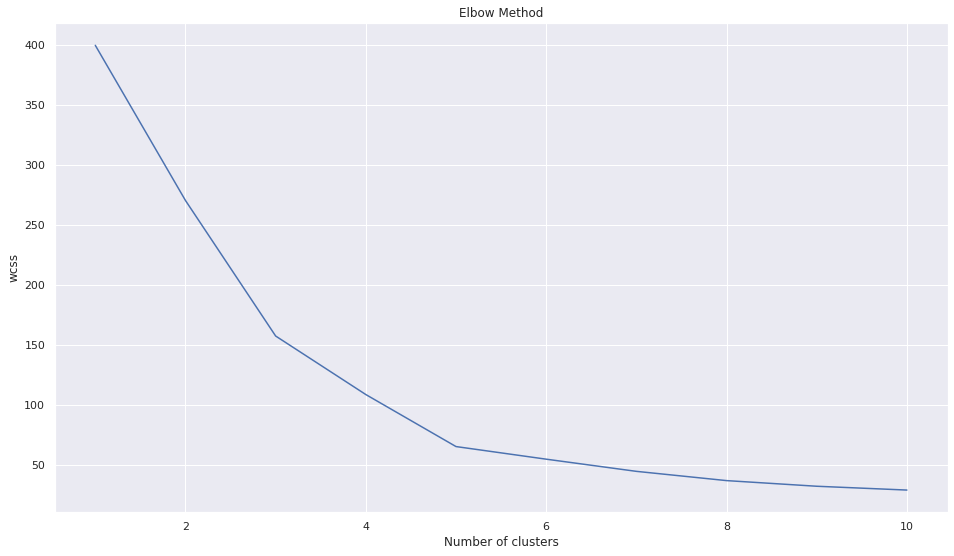

In [42]:
# Transform Data Frame to Numpy Array
income = df_segmentation.to_numpy()
income

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(income)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [43]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(income)
    label = kmeans.labels_
    sil_coeff = silhouette_score(income, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.28640637225274423
For n_clusters=3, The Silhouette Coefficient is 0.46658474419000145
For n_clusters=4, The Silhouette Coefficient is 0.4939069237513199
For n_clusters=5, The Silhouette Coefficient is 0.5546571631111091
For n_clusters=6, The Silhouette Coefficient is 0.5380630705007141
For n_clusters=7, The Silhouette Coefficient is 0.5317107324040978
For n_clusters=8, The Silhouette Coefficient is 0.45644093438859246
For n_clusters=9, The Silhouette Coefficient is 0.4566624374485964
For n_clusters=10, The Silhouette Coefficient is 0.4505029621610447


### **Modeling K-Means**

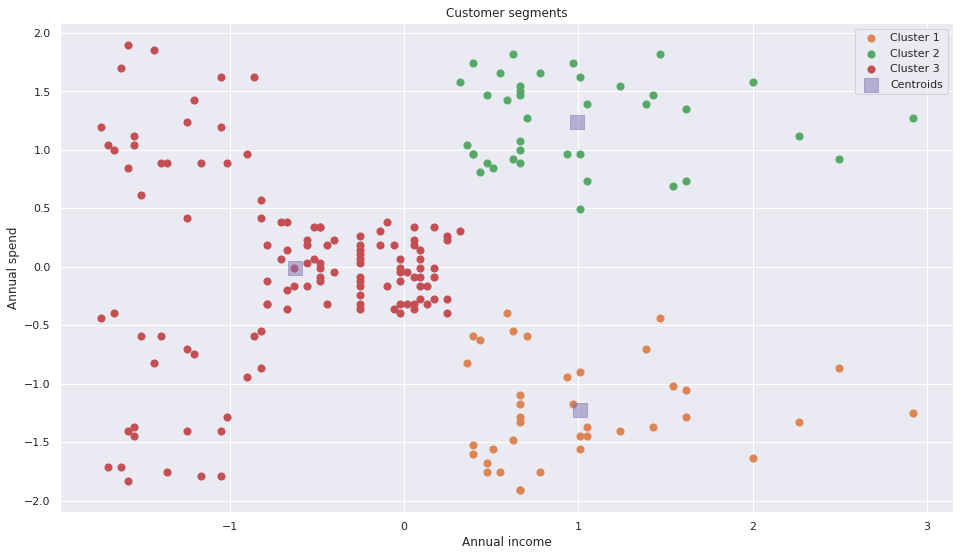

In [46]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(income)

# Visualising Clusters for k=3
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_segmentation)
plt.scatter(income[cluster == 0, 0], income[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[cluster == 1, 0], income[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income[cluster == 2, 0], income[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.5, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

In [47]:
# Add Cluster Information to the Raw Data
df_segmentation['cluster'] = cluster
df_segmentation

,Annual Income (k$),Spending Score (1-100),cluster
0,-1.738999,-0.434801,2
1,-1.738999,1.195704,2
2,-1.700830,-1.715913,2
3,-1.700830,1.040418,2
4,-1.662660,-0.395980,2
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,0
197,2.497807,0.923953,1
198,2.917671,-1.250054,0


In [49]:
# Save= Result
df_segmentation.to_csv('segmentation_clusters.csv', index=False)

### **Hieralchical Clustering**

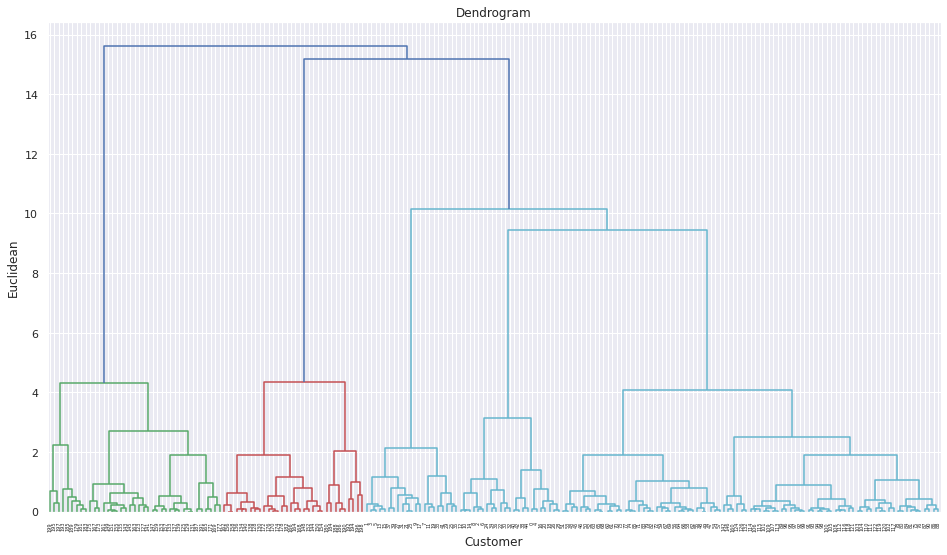

In [50]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(income, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

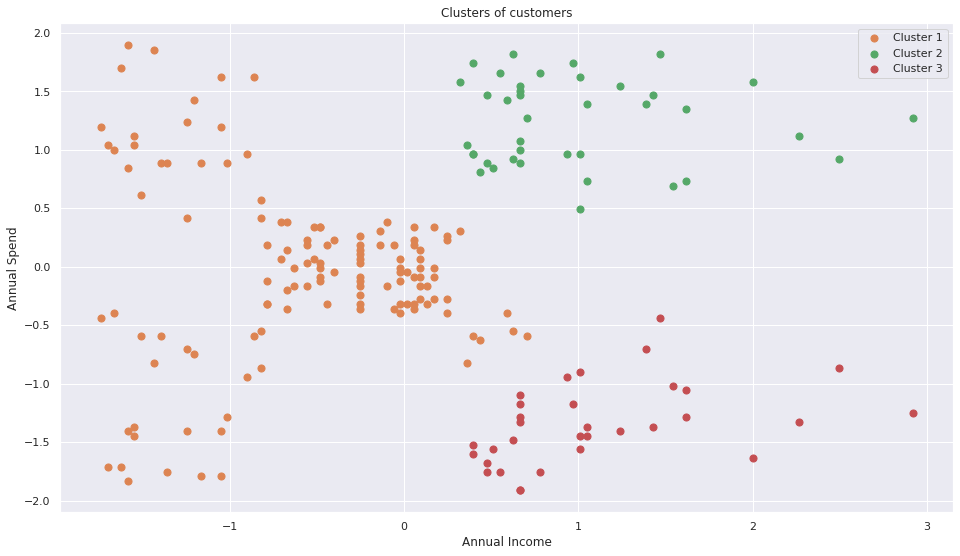

In [52]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(income)

# Visualising Clusters for k=3
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_segmentation)
plt.scatter(income[hcluster == 0, 0], income[hcluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[hcluster == 1, 0], income[hcluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income[hcluster == 2, 0], income[hcluster == 2, 1], s = 50, label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')
plt.legend()
plt.show()